In [37]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans

In [17]:
matplotlib.rc("font", size=18)
phones = pd.read_csv('data/1.8_phones.csv')
phones

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
...,...,...,...,...
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016


In [20]:
X = phones[['disk', 'year']]
y = phones['price']

regression = LinearRegression().fit(X, y)

In [21]:
regression.predict(X[0:10])

array([ 7848.04669442,  7695.81223259,  1720.38970271, 14952.61478392,
        4132.43692097, 15973.89094921,  7695.81223259,  4784.21819857,
       12910.06245336,  6826.77052913])

In [23]:
d1, d2 = list(), list()
for x in np.linspace(min(phones['disk']), max(phones['disk']), 100):
    for y in np.linspace(min(phones['year']), max(phones['year']), 100):
        d1.append(x)
        d2.append(y)
        
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = regression.predict(np.concatenate([d1, d2], axis=1))

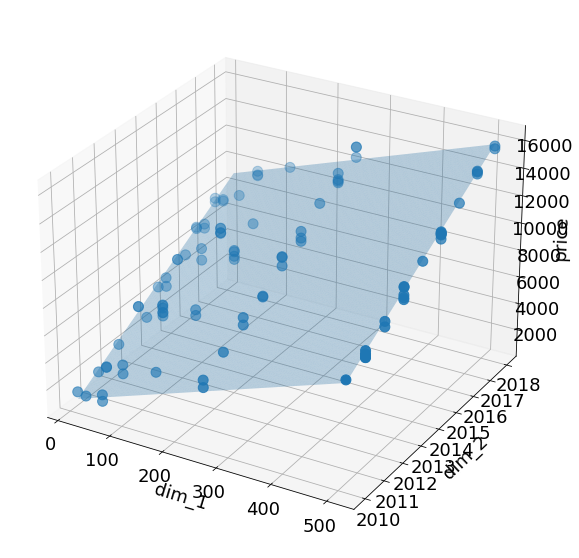

In [24]:
# работа с двумя признаками

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter(phones['disk'], phones['year'], phones['price'], s=100)

ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.3)

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
ax.set_zlabel('price')

ax.elev = 27
plt.show()

In [25]:
#　еще раз взглянем на наш датасет
phones

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
...,...,...,...,...
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016


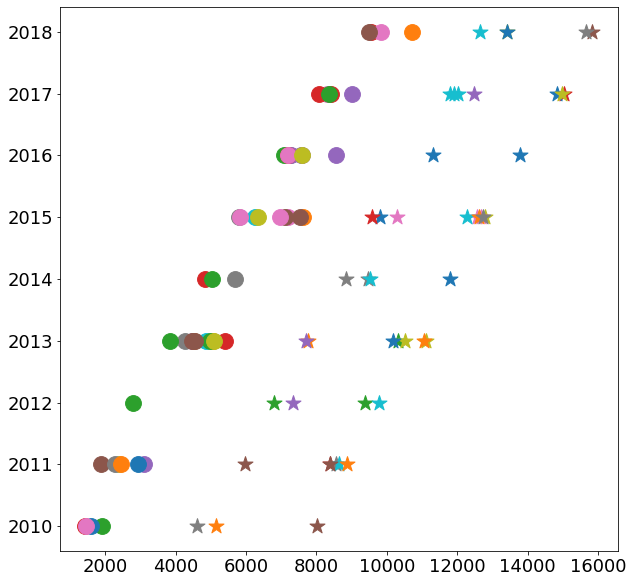

In [32]:
fig = plt.figure(figsize=(10, 10))

markers = {'Android': 'o', 'iOS': '*'}
for d1, d2, l in zip(phones.price, phones.year, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

plt.show()

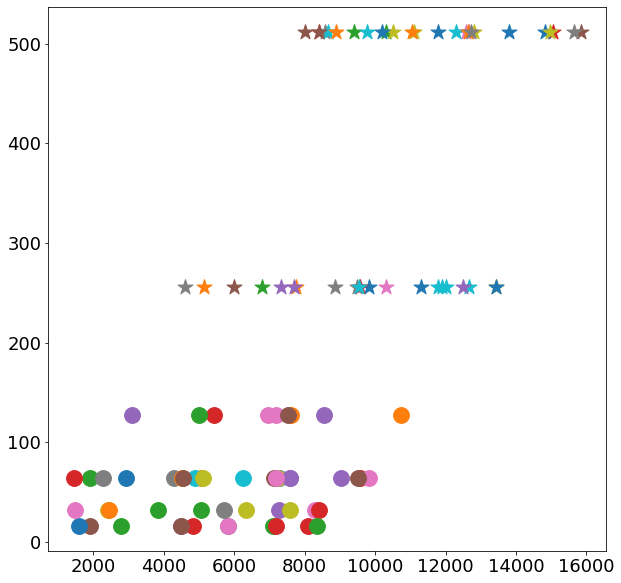

In [33]:
fig = plt.figure(figsize=(10, 10))

markers = {'Android': 'o', 'iOS': '*'}
for d1, d2, l in zip(phones.price, phones.disk, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

plt.show()

In [34]:
# исходя из сделанных визуализаций приходим к выводу что самый выгодный параметр для определения ОС на данном датасете это размер диска

In [35]:
X = phones[['disk']]
y = phones['os']

classification = DecisionTreeClassifier().fit(X, y)

In [36]:
print(export_text(classification))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



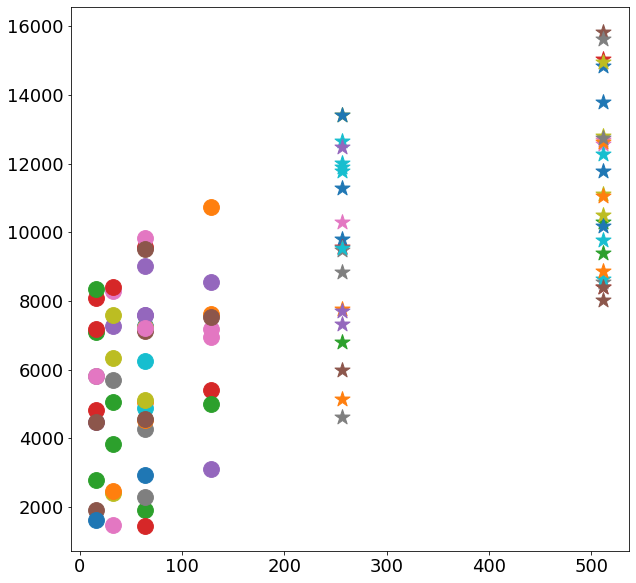

In [40]:
fig = plt.figure(figsize=(10, 10))

markers = {'Android': 'o', 'iOS': '*'}
for d1, d2, l in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

plt.show()

In [58]:
X = phones[['disk', 'price']]

clusters = KMeans().fit(X)

In [59]:
clusters.cluster_centers_

array([[   83.36842105,  4974.05263158],
       [  418.90909091, 12860.90909091],
       [  278.15384615,  8497.69230769],
       [   48.        ,  2204.45454545],
       [  310.15384615,  9829.30769231],
       [  512.        , 15269.6       ],
       [  105.6       ,  7231.1       ],
       [  336.        , 11463.25      ]])

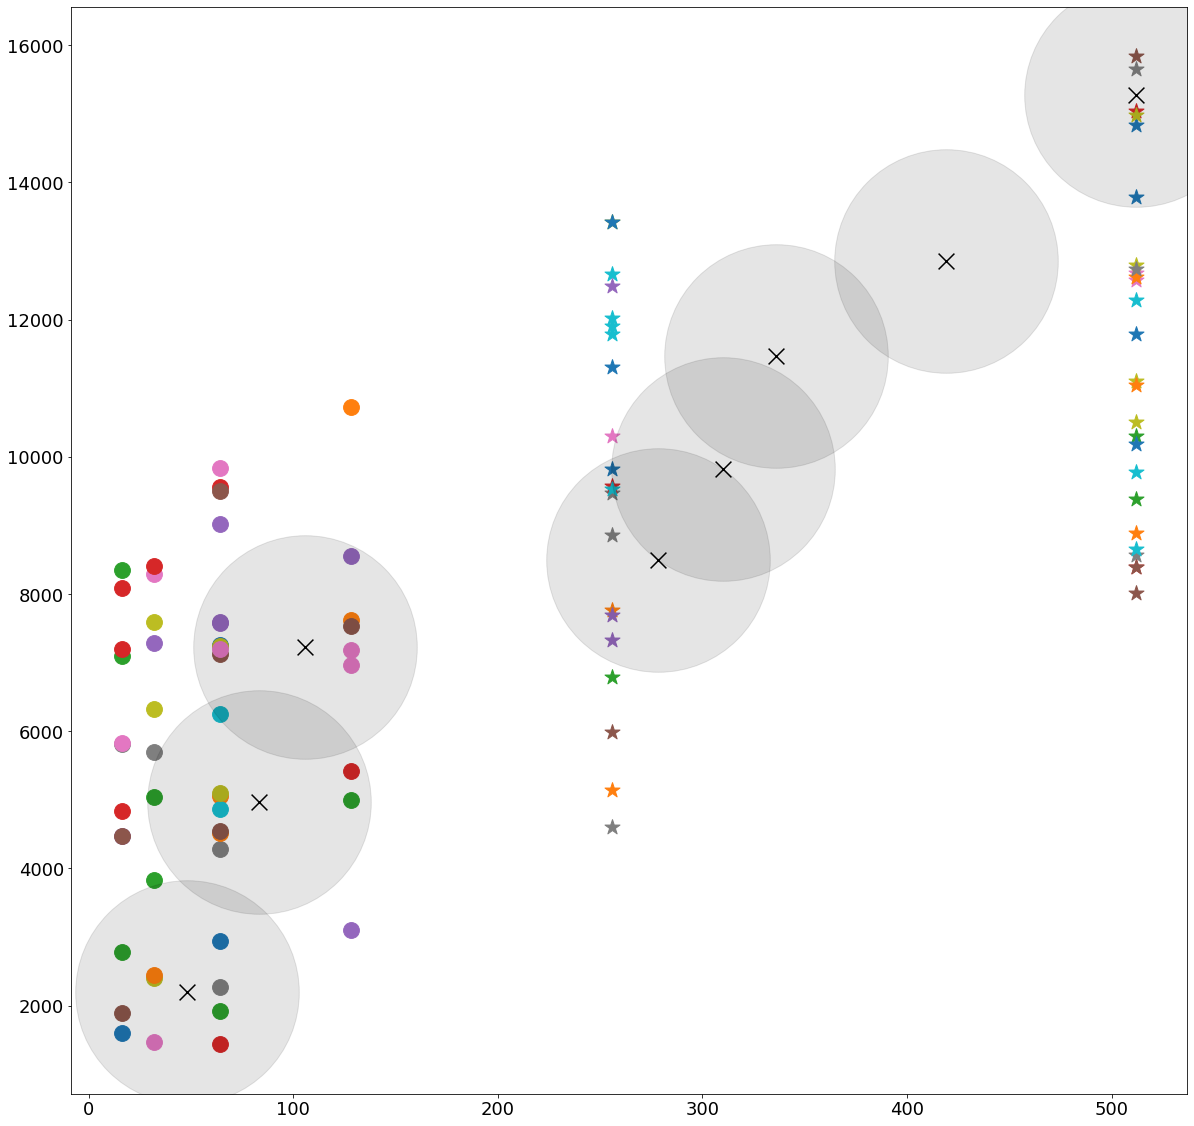

In [60]:
def draw_clusters(phones, clusters):
    fig = plt.figure(figsize=(20, 20))

    markers = {'Android': 'o', 'iOS': '*'}
    for d1, d2, l in zip(phones.disk, phones.price, phones.os):
        plt.scatter(d1, d2, s=250, marker=markers[l])

    for clust_center in clusters.cluster_centers_:
        plt.scatter(clust_center[0], clust_center[1], s=250, marker='x', c='black')
        plt.scatter(clust_center[0], clust_center[1], s=250 * 2e2, c='black', alpha=0.1)

    plt.show()
    
draw_clusters(phones, clusters)

In [61]:
# и так видим что-то жуткое, попробуем ограничить количество кластеров 3 так как там явно выделенны 3

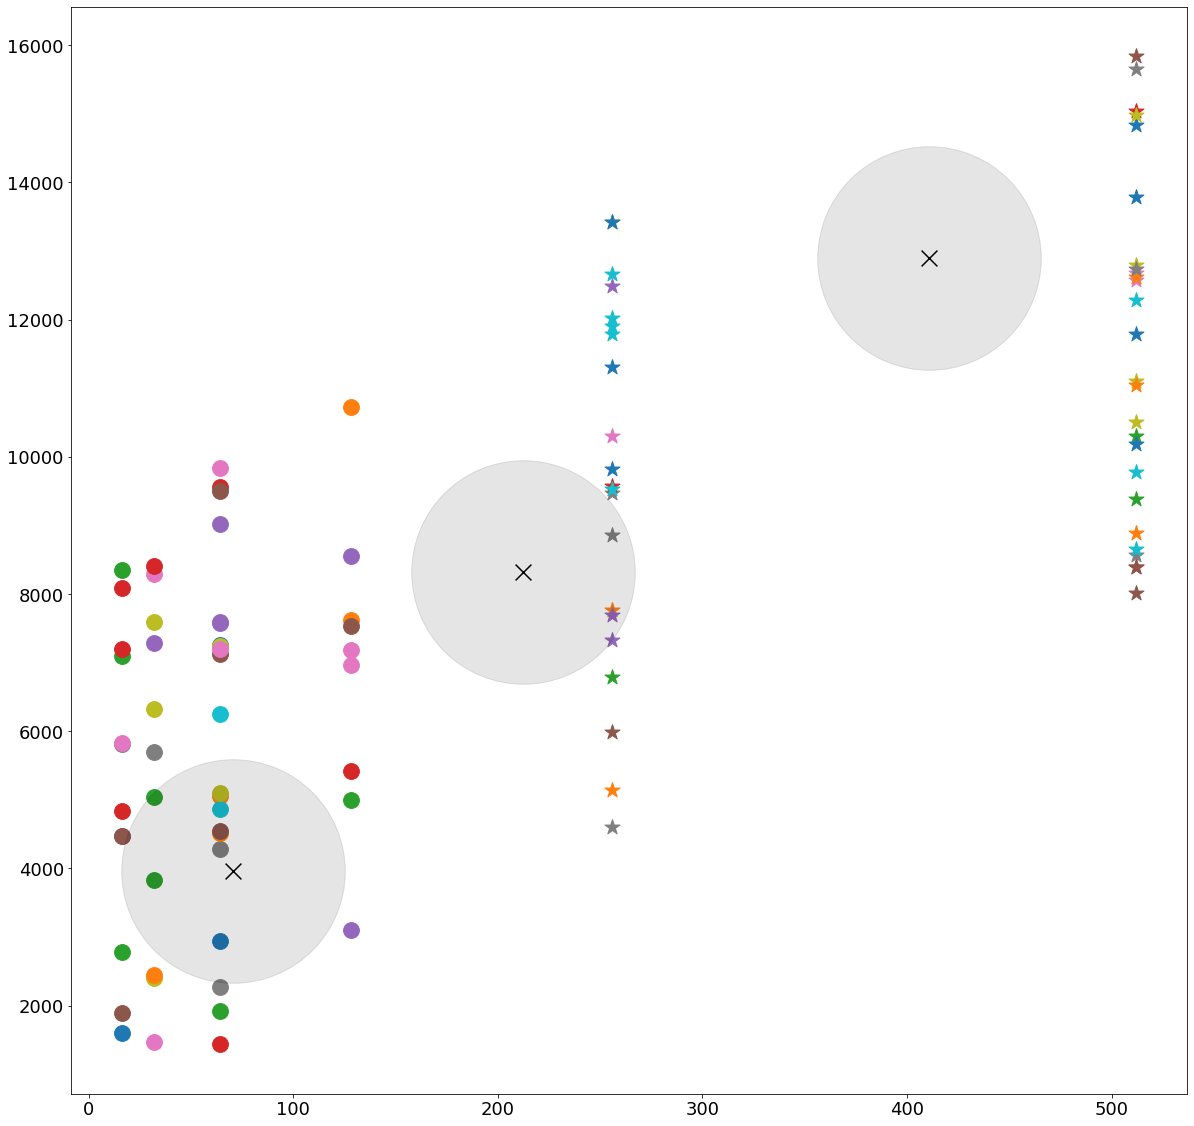

In [68]:
X = phones[['disk', 'price']]

clusters = KMeans(n_clusters=3).fit(X)
draw_clusters(phones, clusters)

In [63]:
# и так опять что-то не совсем хорошо, но это самое явное разделение на разные группы